<a href="https://colab.research.google.com/github/Tosinoladejo1/Binary_Classification_Project/blob/main/LSTM_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO: Import the required libraries

Q6.1: For this task, you’ll be working with a text file containing data that needs to be
preprocessed for further analysis. Start by accessing the file from its location on your drive. Once opened,
read its contents into a string, ensuring that the text is handled in a case-insensitive manner by converting it
to lowercase. To remove punctuations in the text, apply a regular expression that filters out all characters
that are not letters, digits, underscores, or whitespace (not \w and \s in regex). For example:
Sample text: “Hello, World! Welcome to 2024. Let’s preprocess this text: #ECE-657 @UWaterloo"
Preprocessed sample text: “hello world welcome to 2024 lets preprocess this text ece657 uwaterloo"
This preprocessing step simplifies the text, making it uniform and easier to analyze in subsequent tasks. Print
the length of the final processed text obtained.

In [3]:
# TODO
import os
import numpy as np
import tensorflow as tf
import random
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Embedding, LayerNormalization, GRU, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive

# Adding random seed

In [4]:
# Set environment variables
os.environ['PYTHONHASHSEED'] = str(25)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set seed values
np.random.seed(25)
tf.random.set_seed(25)
random.seed(25)

# TODO: Read and Preprocess the dataset

In [5]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/alice.txt'
text = ""

# TODO: Load and preprocess the text
def tokenize(text):
    pattern = re.sub(r'[^\w\s]', '', text)
    return pattern.lower()

with open(path, 'r', encoding='utf-8') as file:
   words = file.read()
text = tokenize(words)

Mounted at /content/drive


In [6]:
print(len(text))

140269


Q6.2: Initiate the process of text tokenization which is vital for preparing data for natural
language processing models. Utilize the Tokenizer from the TensorFlow Keras library used for preparing
text data for deep learning models to analyze the text and identify unique words. By fitting the tokenizer
to the text, it constructs a comprehensive dictionary of these unique words. Subsequently, calculate the
total number of unique words, which is essential for configuring various model parameters, such as input
dimensions in neural networks. This total also includes an additional count to accommodate the tokenizer’s
indexing method. Print the total number of words.

# TODO: Using tokenizers

In [7]:
# TODO: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [8]:
print(total_words)

2751


Q6.3: In this task, you’ll prepare input sequences for training by first splitting the preprocessed
text on newline character and converting each line into a list of tokenized words. For each line, generate
n-gram sequences of increasing length to create a comprehensive set of training samples. These n-grams,
which consist of consecutive tokens, help the model learn contextual relationships within the data. After
constructing these sequences, identify the maximum sequence length and standardize all sequences to this
length using padding. This padding, typically added to the beginning of sequences, ensures that all input
data fed into the model maintains a consistent format, crucial for effective training of sequence-based neural
networks like LSTMs or RNNs. For example for the given text,
"Hello world
How are you"
Following steps will occur:
Tokenizer mapping: {"hello": 1, "world": 2, "how": 3, "are": 4, "you": 5}
After tokenization and creating n-gram sequences:
For "Hello world": [1, 2]
For "How are you": [3, 4], [3, 4, 5]
Combining all n-gram sequences:[[1, 2], [3, 4], [3, 4, 5]]
Maximum sequence length: 3
After padding:[[0, 1, 2], [0, 3, 4], [3, 4, 5]]
For the following steps print the number of input sequences finally created for the actual given text.

# TODO: Feature Engineering

In [12]:
# TODO: Create input sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
         n_gram_sequence = token_list[:i+1]
         input_sequences.append(n_gram_sequence)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len, padding='pre'))
print(input_sequences)
 # TODO: Pad sequences

[[   0    0    0 ...    0  274  465]
 [   0    0    0 ...  274  465   11]
 [   0    0    0 ...  465   11  682]
 ...
 [   0    0    0 ...    1 2750 1452]
 [   0    0    0 ... 2750 1452  793]
 [   0    0    0 ...    0    1  212]]


In [13]:
print(input_sequences.shape)

(23693, 16)


Q6.4: In this phase of preparing your data for machine learning models, you’ll separate the
previously formatted input sequences into predictors (features) and labels (targets). By slicing the sequences,
the last token of each sequence becomes the label, while the preceding tokens form the predictors. Convert the
label tokens into one-hot encoded vectors using TensorFlow’s utility function, facilitating effective categorical
output prediction. Subsequently, divide your dataset into training and validation subsets using a 20% split
for validation. Print the size of the train and validation subsets for the features and targets.

# TODO: Storing features and labels

In [14]:
# TODO: Create predictors and labels
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))
      # TODO: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=25)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")



X_train shape: (18954, 15)
y_train shape: (18954, 2751)
X_val shape: (4739, 15)
y_val shape: (4739, 2751)


Q6.5: Create a simple LSTM-based model by defining a sequential architecture. Begin with an
embedding layer that uses the total number of words as the input dimension, and an output dimension of
100. Follow this with an LSTM layer containing 150 units. Then, add a dense layer with the total number of
words as the output dimension, using the softmax activation function. Compile the model with categorical
cross-entropy as the loss function, the Adam optimizer, and accuracy as the metric. After defining the model,
print its summary. Build and train the model for 20 epochs. After training, visualize the performance by
plotting the training and validation accuracy and loss over the epochs. Is the model overfitting? Explain
your observation. Create one more model of your choice (you may explore Bidirectional, LayerNormalization,
Dropout, Attention and GRU etc) that improves upon the previous model in terms of overfitting. Print this
new model summary, train for 20 epochs, and then plot the training and validation accuracy and loss

# TODO: Building our model

In [19]:
# TODO: Build your model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 100)           275100    
                                                                 
 lstm_3 (LSTM)               (None, 150)               150600    
                                                                 
 dense_3 (Dense)             (None, 2751)              415401    
                                                                 
Total params: 841101 (3.21 MB)
Trainable params: 841101 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# TODO: Model training

In [21]:
# TODO: Train your model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
593/593 [==============================] - 27s 45ms/step - loss: 5.9866 - accuracy: 0.0654 - val_loss: 6.0345 - val_accuracy: 0.0637
Epoch 2/20
593/593 [==============================] - 25s 43ms/step - loss: 5.6685 - accuracy: 0.0825 - val_loss: 5.8446 - val_accuracy: 0.0867
Epoch 3/20
593/593 [==============================] - 27s 46ms/step - loss: 5.3565 - accuracy: 0.1043 - val_loss: 5.7192 - val_accuracy: 0.1000
Epoch 4/20
593/593 [==============================] - 37s 62ms/step - loss: 5.0671 - accuracy: 0.1269 - val_loss: 5.6533 - val_accuracy: 0.1177
Epoch 5/20
593/593 [==============================] - 27s 45ms/step - loss: 4.8101 - accuracy: 0.1450 - val_loss: 5.6169 - val_accuracy: 0.1306
Epoch 6/20
593/593 [==============================] - 29s 48ms/step - loss: 4.5764 - accuracy: 0.1610 - val_loss: 5.6036 - val_accuracy: 0.1357
Epoch 7/20
593/593 [==============================] - 30s 50ms/step - loss: 4.3554 - accuracy: 0.1791 - val_loss: 5.6346 - val_accuracy:

# TODO: Visualising the Training and Validation Accuracies and Losses against the number of Epochs

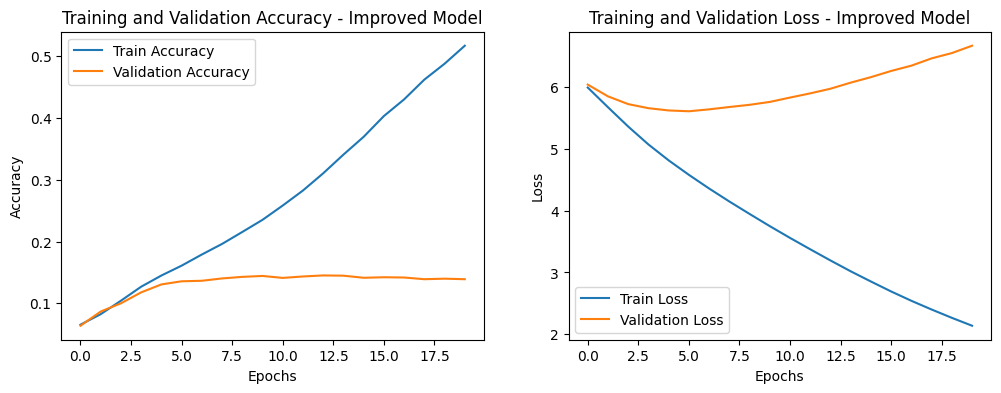

In [24]:
# TODO: Plotting the training and validation loss and accuracy
plt.figure(figsize=(12, 4))
# Accuracy plot
plt.subplot (1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy') # Use 'history' instead of 'improved_history'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title( 'Training and Validation Accuracy - Improved Model' )
plt.xlabel( 'Epochs')
plt.ylabel( 'Accuracy')
plt. legend ( )
# Loss plot
plt. subplot (1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss') # Correct typo: 'plt-plot' to 'plt.plot'
plt.plot(history.history['val_loss'], label='Validation Loss') # Correct typo: 'plt-plot' to 'plt.plot'
plt.title( 'Training and Validation Loss - Improved Model')
plt.xlabel( 'Epochs')
plt.ylabel( 'Loss')
plt. legend ( )
plt.show()


Q6.6: Define the generate_text() function that takes a starting text, the desired number
of additional words, a predictive model, the maximum sequence length, and a temperature parameter as
inputs. Within the function, predict the subsequent word iteratively based on the evolving text. In each
iteration, convert the current text into tokens, pad these tokens to the required sequence length, and use the
model to predict the logits (unnormalized predictions generated by the last layer of a neural network before
applying an activation function) for the next word. Adjust the logits by the temperature parameter, apply
the softmax function to get probabilities, and sample the next word’s index based on these probabilities.
Map this index back to the corresponding word using the tokenizer, and append the word to the current text.
Ultimately, return the expanded text that now includes the newly generated words, effectively extending
the original text input. The temperature parameter in NLP controls the randomness of the predictions by
adjusting the probability distribution of the next word. Lower temperatures make the model more confident
and deterministic, often resulting in more repetitive and conservative text, while higher temperatures increase
randomness, producing more diverse and creative outputs but also raising the risk of generating incoherent
text. Demonstrate the function by generating text with temperature values 0.05 and 1.5 using the previously
created model with less overfitting.

# TODO: Generate text

In [40]:
# TODO: Function to generate text
def prepare_input(text):
    sequence = tokenizer.texts_to_sequences([text])[0]
    return sequence
def sample(preds, temperature):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def generate_text(seed_text, next_words, model, max_sequence_len, temperature):
    input_text = seed_text
    for _ in range(next_words):
        sequence = prepare_input(input_text)
        predictions = model.predict(np.array(sequence).reshape(1, -1))
        next_index = sample(predictions[-1], temperature)
        next_word = tokenizer.index_word[next_index]
        input_text += " " + next_word
    return input_text

# Generate text
seed_text = "Forest is"
next_words = 10
generated_text = generate_text(seed_text, next_words, model, max_sequence_len, temperature=0.05)
generated_text2 = generate_text(seed_text, next_words, model, max_sequence_len, temperature=1.5)
print(generated_text)
print (generated_text2)

1/1 [==============================] - 0s 49ms/step
Forest is blame to be sure i shant be told you end
Forest is trees wake barleysugar executed place nibbling little smiled here dont


Q6.7: In the preprocessing step for NLP, removing stop words is often considered important.
We did not perform stop word removal in our text generation task. Should we have done that? Explain
reasons to support your answer


Stop word removal is typically performed to reduce the size of the dataset and focus on the meaningful words. However, in language modeling and next word prediction tasks, it plays a crucial role in maintaining the context and structure of the sentences.so removing stop words might lead to loss of important contextual information, especially in generative models. Therefore, it better not to remove stop words.
